In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Load the dataset**

In [3]:
#Import the dataset
df = pd.read_csv('/media/simhan/Simhan/MIT/IBMNT/abalone.csv')

# **Descriptive Analysis**

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.kurt()

/tmp/ipykernel_12963/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

In [8]:
df.skew()

/tmp/ipykernel_12963/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# **Handling Missing Values**

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

In [11]:
df.drop_duplicates()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# **Outlier** **Detection**

In [12]:
def remove_outlier(dataset,col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR

    for i in df.index:
        if col[i]>upper_bound:
            col[i]=lower_bound
        if col[i]>upper_bound:
            col[i]=upper_bound


In [13]:
remove_outlier(df,df["Length"])
remove_outlier(df,df["Diameter"])
remove_outlier(df,df["Height"])
remove_outlier(df,df["Whole weight"])
remove_outlier(df,df["Shucked weight"])
remove_outlier(df,df["Viscera weight"])
remove_outlier(df,df["Shell weight"])

/tmp/ipykernel_12963/1475550051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=lower_bound


In [14]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.138991,0.806985,0.343284,0.176314,0.231379,9.933684
std,0.120093,0.099240,0.038518,0.487023,0.217233,0.108762,0.136742,3.224169
min,0.075000,0.055000,0.000000,-0.625750,-0.288000,-0.145750,-0.168500,1.000000
25%,0.450000,0.350000,0.115000,0.433500,0.177500,0.091000,0.125000,8.000000
50%,0.545000,0.425000,0.140000,0.790500,0.328500,0.168500,0.229500,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.494500,0.249500,0.323500,11.000000
max,0.815000,0.650000,0.240000,2.210000,0.965500,0.492000,0.625000,29.000000


# **Data Visualization**

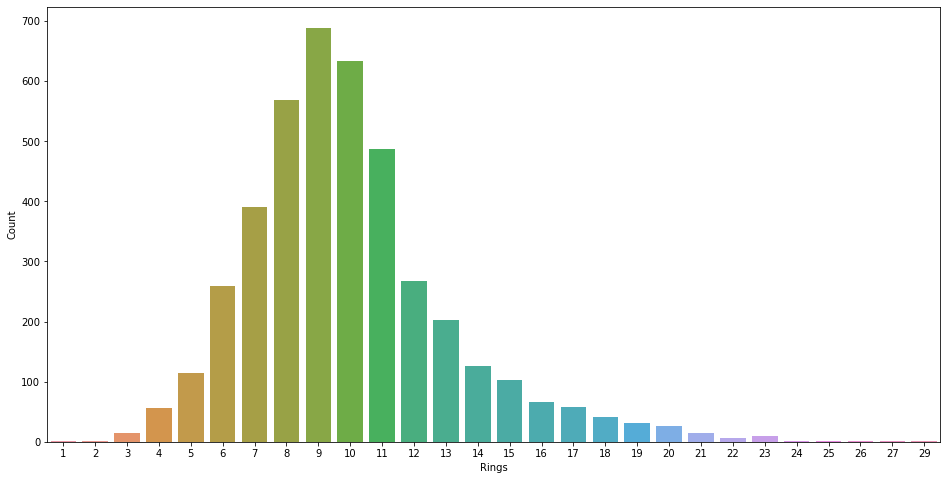

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x ='Rings', data = df)
plt.xlabel("Rings")
plt.ylabel("Count")
plt.show()

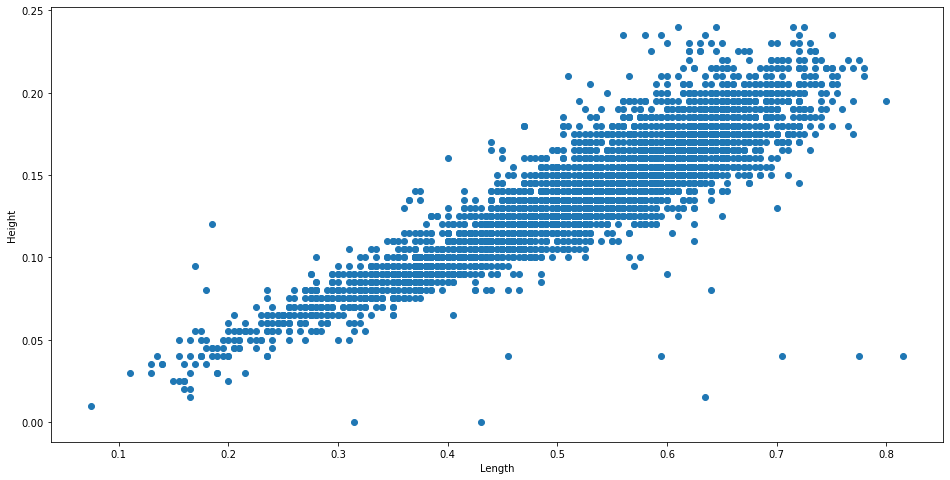

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(df["Length"],df["Height"])
plt.xlabel("Length")
plt.ylabel("Height")
plt.show()

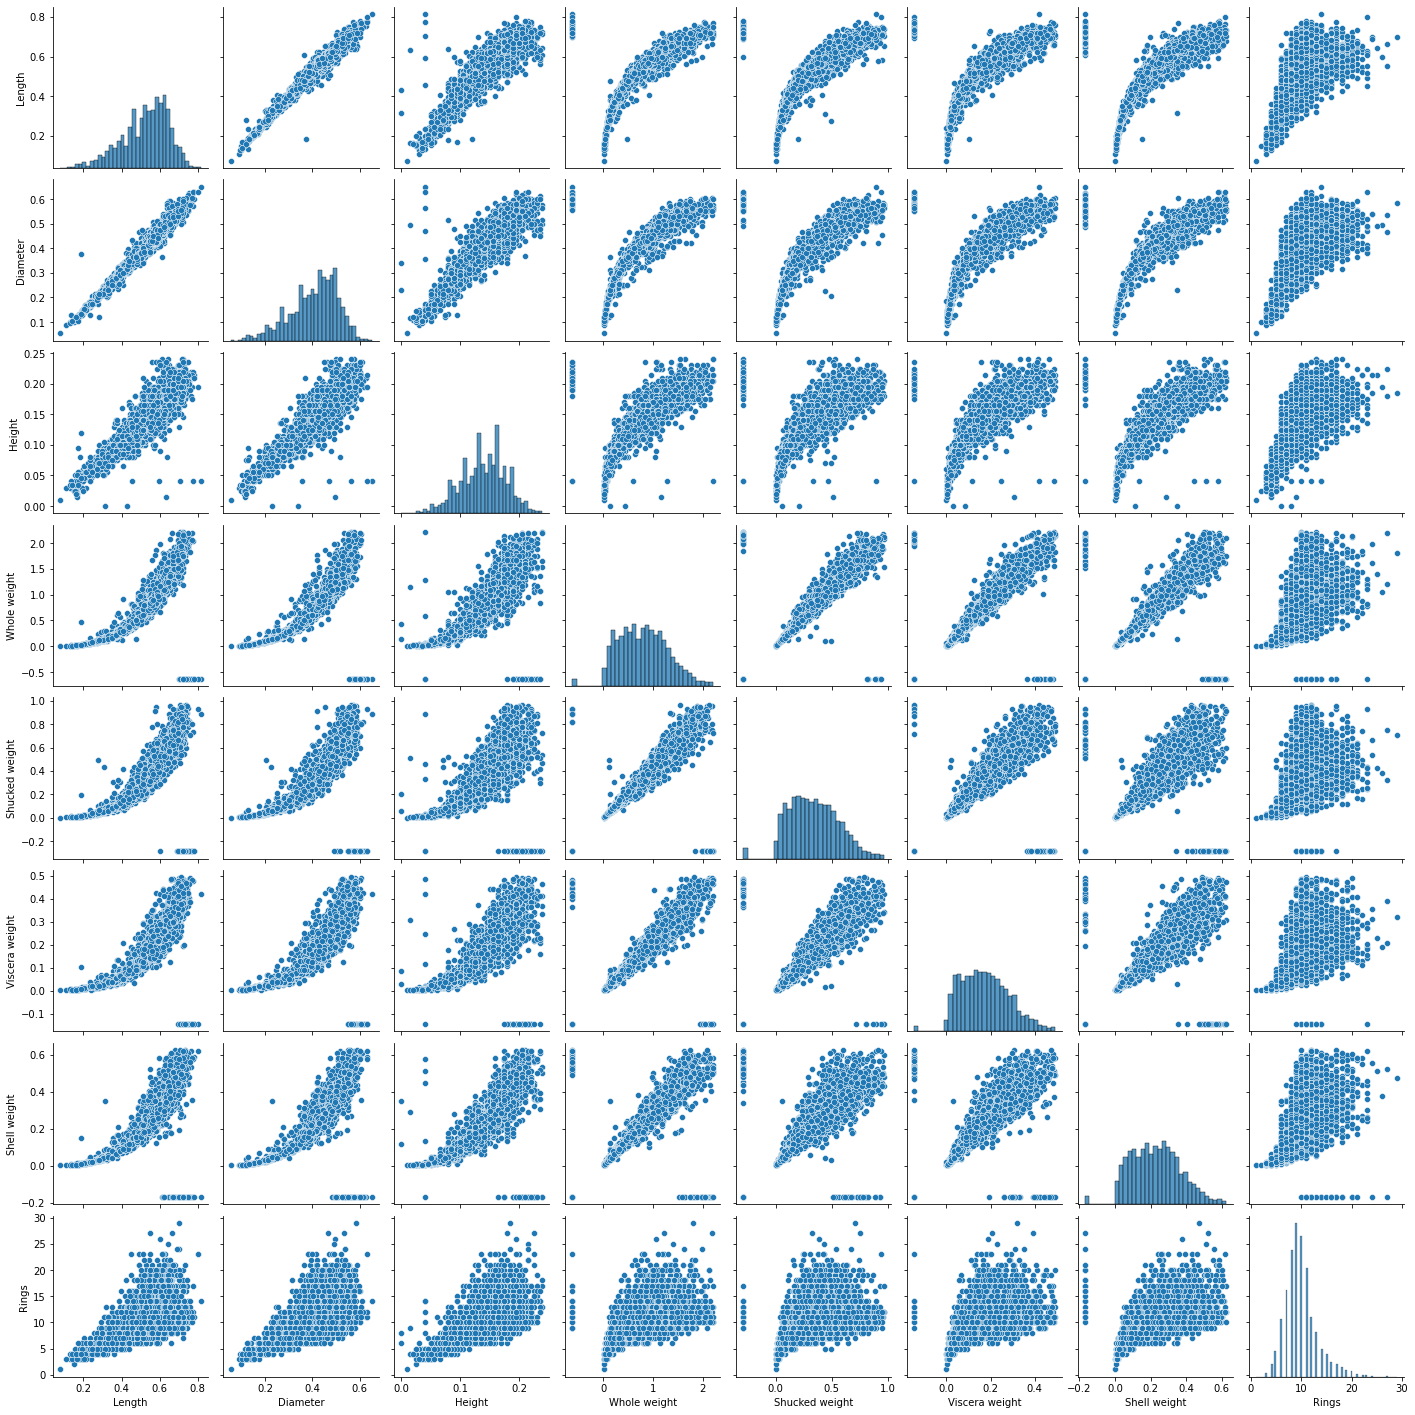

In [17]:
sns.pairplot(df)

# **Label Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df["Sex"]=labelencoder.fit_transform(df["Sex"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **Split the Dataset**

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# **Train and Test**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.02, random_state=0)

# **Scaling the dataset**

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model Building and Evaluation**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error

knn = KNeighborsClassifier(n_neighbors=400)
knn.fit(X_train, y_train)

pred_knn=knn.predict(X_test)
print("Accuracy Score of the Model is:",accuracy_score(y_test,pred_knn))

Accuracy Score of the Model is: 0.2857142857142857


In [23]:
from sklearn.svm import SVC  
clf = SVC() 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

pred_svm=clf.predict(X_test)
print("Accuracy Score of the Model is:",accuracy_score(y_test,pred_svm))

Accuracy Score of the Model is: 0.32142857142857145


In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

pred_lm=model.predict(X_test)

print("Mean absolute error:",mean_absolute_error(y_test,pred_lm))
print("Mean Squared error:",mean_squared_error(y_test,pred_lm))

Mean absolute error: 1.7303803935126882
Mean Squared error: 5.043447636637931
